In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import MoS2_data_cleaning as mo
import os
import re

In [2]:
directory_path = "C:\\Users\\sophi\\Box\\MoS2Project\\2025-10-18-CVD\\SingleGate\\IdVd"  # Replace with your directory path
if not os.path.isdir(f'{directory_path}\sorted'):
    os.mkdir(f'{directory_path}\sorted')
file_list = []
for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)
    if os.path.isfile(file_path):
        file_list.append(file_path)

In [3]:
file_first = file_list[0]
df = mo.read_csv_direction(file_first)
df

,VD,VG,VBG,ID,IG,sqrtID,forward
0,0.000,-1.5,2,-0.000698,-2.268000e-11,0.000026,True
1,0.015,-1.5,2,-0.000270,-2.063000e-11,0.000016,True
2,0.030,-1.5,2,-0.000177,-1.976000e-11,0.000013,True
3,0.045,-1.5,2,-0.000121,-1.872000e-11,0.000011,True
4,0.060,-1.5,2,-0.000081,-1.828000e-11,0.000009,True
...,...,...,...,...,...,...,...
1409,0.060,1.5,2,0.055357,1.874400e-10,0.000235,False
1410,0.045,1.5,2,0.041790,1.815400e-10,0.000204,False
1411,0.030,1.5,2,0.027864,1.901700e-10,0.000167,False
1412,0.015,1.5,2,0.013644,1.909400e-10,0.000117,False


In [4]:
df_reshaped = mo.reshape_table_by_VG(df)
df_reshaped.columns

MultiIndex([(' ID', -1.5),
            (' ID', -1.0),
            (' ID', -0.5),
            (' ID',  0.0),
            (' ID',  0.5),
            (' ID',  1.0),
            (' ID',  1.5)],
           names=[None, ' VG'])

In [5]:
df_sorted = mo.reorder_by_VD(df_reshaped)
df_new = df_sorted.reset_index().set_index(' VD')
df_new

,forward,V_G = -1.5,V_G = -1.0,V_G = -0.5,V_G = 0.0,V_G = 0.5,V_G = 1.0,V_G = 1.5
VD,,,,,,,,
0.000,False,-0.000166,-0.000175,-0.000133,-0.000220,-0.000283,-0.000349,-0.000421
0.015,False,-0.000137,-0.000137,-0.000171,0.000915,0.007273,0.012029,0.013644
0.030,False,-0.000164,-0.000162,-0.000138,0.001896,0.014911,0.024447,0.027864
0.045,False,-0.000138,-0.000137,-0.000159,0.002735,0.022366,0.036425,0.041790
0.060,False,-0.000170,-0.000168,-0.000133,0.003428,0.029960,0.048190,0.055357
...,...,...,...,...,...,...,...,...
0.060,True,-0.000081,0.000018,0.000017,0.004080,0.029615,0.048343,0.056127
0.045,True,-0.000121,0.000007,0.000004,0.003267,0.022624,0.036809,0.042319
0.030,True,-0.000177,-0.000008,-0.000013,0.002299,0.015148,0.024821,0.028611


In [6]:
df_new.drop(columns=' forward',inplace=True)
df_new.columns

Index(['V_G = -1.5', 'V_G = -1.0', 'V_G = -0.5', 'V_G = 0.0', 'V_G = 0.5',
       'V_G = 1.0', 'V_G = 1.5'],
      dtype='object')

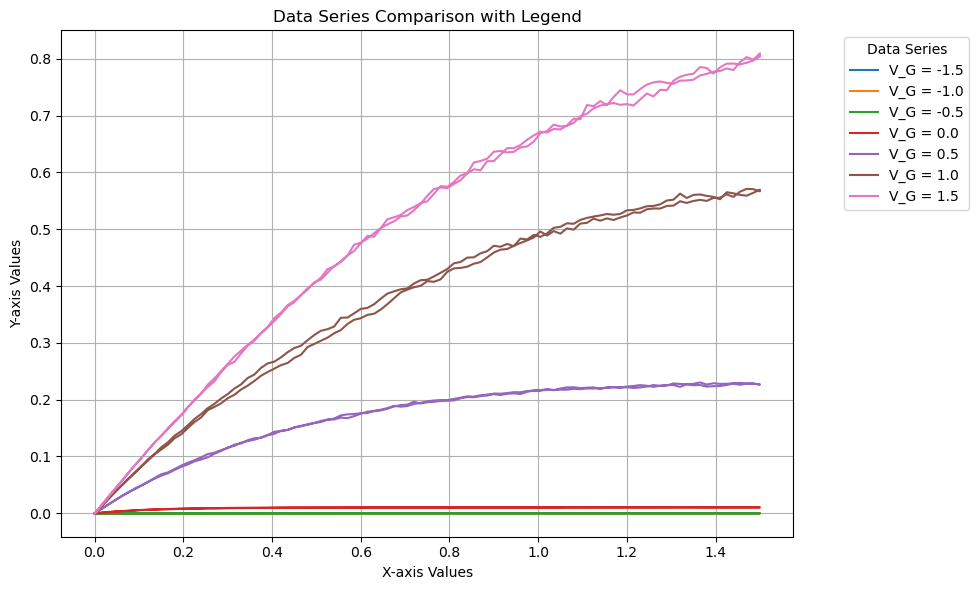

In [8]:
ax = df_new.plot( kind='line', figsize=(10, 6))

# 3. Add labels and title
plt.title('Data Series Comparison with Legend')
plt.xlabel('X-axis Values')
plt.ylabel('Y-axis Values')

# 4. Customize and display the legend
plt.legend(title='Data Series', loc='upper right', bbox_to_anchor=(1.25, 1)) # Example of placing legend outside
plt.grid(True)
plt.tight_layout() # Adjust layout to prevent labels/legend from overlapping
plt.show()

In [9]:
for file in file_list:
    print(f'{file} started')
    
    df = mo.read_csv_direction(file)
    df_reshaped = mo.reshape_table_by_VG(df)
    df_sorted = mo.reorder_by_VD(df_reshaped)
    df_new = df_sorted.reset_index().set_index(' VD')
    df_new.drop(columns=' forward',inplace=True)
    filename =directory_path + '\\sorted\\' + file[62:]
    df_new.to_csv(filename, index=True)
    

C:\Users\sophi\Box\MoS2Project\2025-10-18-CVD\SingleGate\IdVd\R10C3-B__ExfoliatedMoS2_TGIdVd.csv started
C:\Users\sophi\Box\MoS2Project\2025-10-18-CVD\SingleGate\IdVd\R10C3-T__ExfoliatedMoS2_TGIdVd.csv started
C:\Users\sophi\Box\MoS2Project\2025-10-18-CVD\SingleGate\IdVd\R10C4-B__ExfoliatedMoS2_TGIdVd.csv started
C:\Users\sophi\Box\MoS2Project\2025-10-18-CVD\SingleGate\IdVd\R10C4-T__ExfoliatedMoS2_TGIdVd.csv started
C:\Users\sophi\Box\MoS2Project\2025-10-18-CVD\SingleGate\IdVd\R11C2-B__ExfoliatedMoS2_TGIdVd.csv started
C:\Users\sophi\Box\MoS2Project\2025-10-18-CVD\SingleGate\IdVd\R11C3-B__ExfoliatedMoS2_TGIdVd.csv started
C:\Users\sophi\Box\MoS2Project\2025-10-18-CVD\SingleGate\IdVd\R11C4-B__ExfoliatedMoS2_TGIdVd.csv started
C:\Users\sophi\Box\MoS2Project\2025-10-18-CVD\SingleGate\IdVd\R11C5-B__ExfoliatedMoS2_TGIdVd.csv started
C:\Users\sophi\Box\MoS2Project\2025-10-18-CVD\SingleGate\IdVd\R7C10-B__ExfoliatedMoS2_TGIdVd.csv started
C:\Users\sophi\Box\MoS2Project\2025-10-18-CVD\SingleGat